<a href="https://colab.research.google.com/github/Ell-neto/DL_Keras/blob/main/previsao_com_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Carregando os dados

In [43]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
uri = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv"
passageiros = pd.read_csv(uri, sep=",")
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [3]:
mpl.rcParams['figure.figsize'] = (10,6)
mpl.rcParams['font.size'] = 22

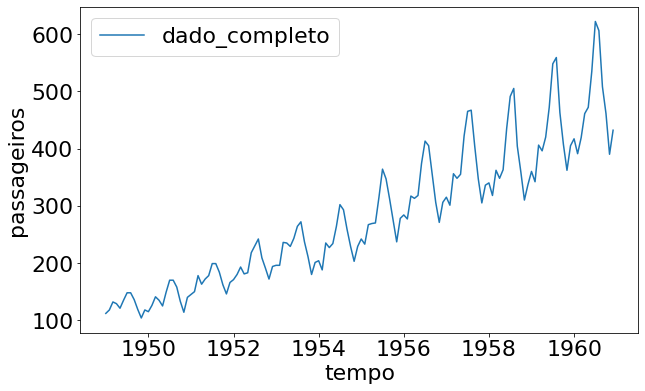

In [4]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
plt.show()

## Pre-processamento dos dados

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler()

In [7]:
sc.fit(passageiros)

StandardScaler()

In [8]:
dado_escalado = sc.transform(passageiros)

In [9]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

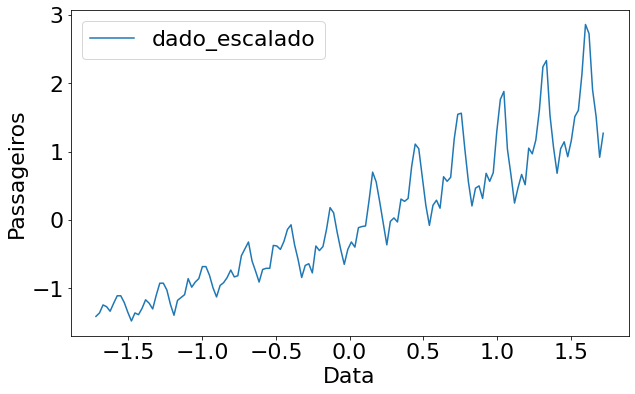

In [10]:
sns.lineplot(x=x, y=y, label='dado_escalado')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

In [11]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [12]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [13]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

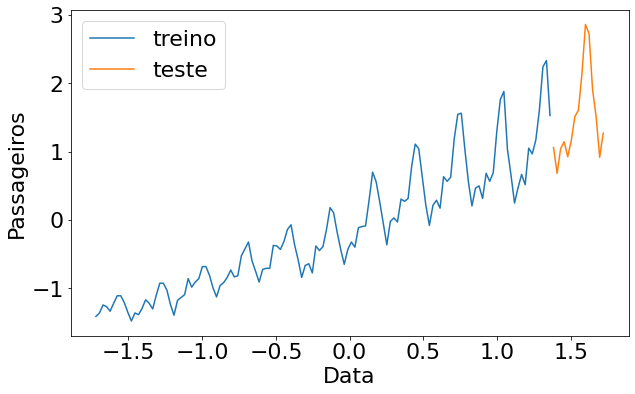

In [14]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
plt.ylabel('Passageiros')
plt.xlabel('Data')
plt.show()

## Utilizando o Keras

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
regressor = Sequential()

In [17]:
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [18]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [19]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [20]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 0s 2ms/step - loss: 0.1286


In [21]:
y_predict = regressor.predict(xtreino)

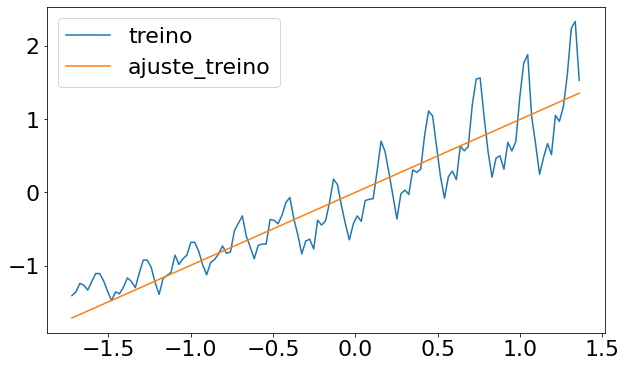

In [22]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='ajuste_treino')
plt.show()

In [23]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [24]:
resultados = pd.DataFrame(d)
resultados.head()

,tempo,passageiros
0,-1.720064,-1.712498
1,-1.696007,-1.688547
2,-1.671950,-1.664596
3,-1.647894,-1.640645
4,-1.623837,-1.616694


In [25]:
resultado_transf = sc.inverse_transform(resultados)

In [26]:
resultado_transf = pd.DataFrame(resultado_transf)

In [27]:
resultado_transf.columns = ['tempo', 'passageiros']

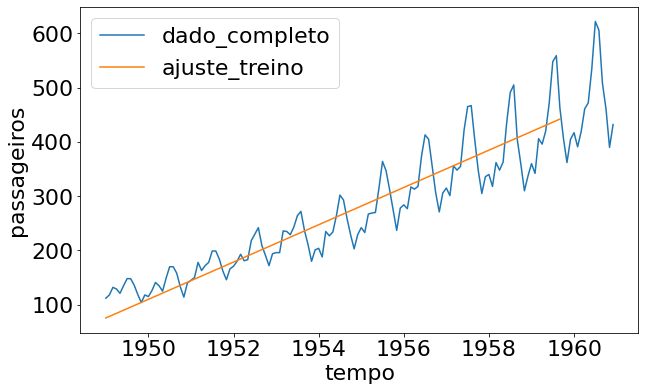

In [28]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
plt.show()

In [29]:
y_predict_teste = regressor.predict(xteste)

In [30]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(d)

In [31]:
resultados_transf_teste = sc.inverse_transform(resultados_teste)

In [32]:
resultados_transf_teste = pd.DataFrame(resultados_transf_teste)

In [33]:
resultados_transf_teste.columns = ['tempo', 'passageiros']

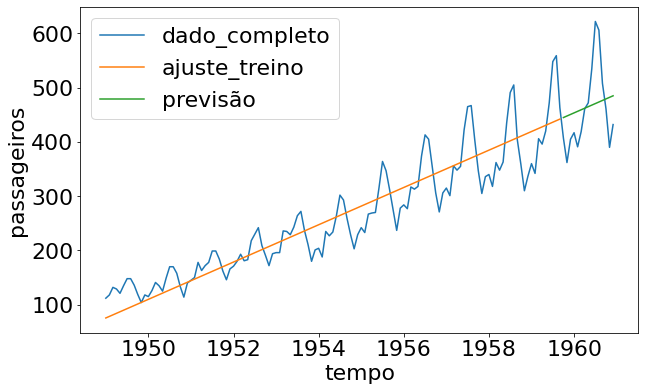

In [34]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')
sns.lineplot(x='tempo', y='passageiros', data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo', y='passageiros', data=resultados_transf_teste, label='previsão')
plt.show()

In [35]:
regressor2 = Sequential()

In [36]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(8, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False))

In [37]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [38]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [39]:
regressor2.fit(xtreino, ytreino, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7953
Epoch 2/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7913
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7890
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7879
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7862
Epoch 6/500
5/5 [==============================] - 0s 4ms/step - loss: 0.7849
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7836
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7830
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7820
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7800
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7799
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 0.7789
Epoch 13/500
5/5 [==============================] - 0s 2ms/st

In [40]:
y_predict2 = regressor2.predict(xtreino)

In [41]:
y_predict_teste2 = regressor2.predict(xteste)

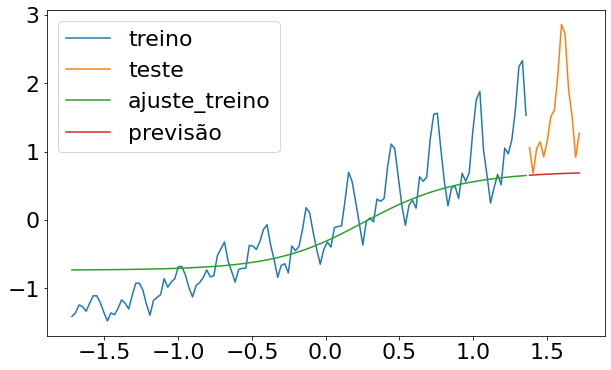

In [42]:
sns.lineplot(x=xtreino, y=ytreino, label='treino')
sns.lineplot(x=xteste, y=yteste, label='teste')
sns.lineplot(x=xtreino, y=y_predict2[:,0], label='ajuste_treino')
sns.lineplot(x=xteste, y=y_predict_teste2[:,0], label='previsão')
plt.show()

## Alterando os dados

In [44]:
vetor = pd.DataFrame(ytreino)[0]

In [45]:
def separa_dados(vetor, n_passos):
  X_novo, y_novo = [], []

  for i in range(n_passos, vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo)
  return X_novo, y_novo

In [46]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [47]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [48]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [49]:
vetor2 = pd.DataFrame(yteste)[0]

In [50]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [51]:
regressor3 = Sequential()

In [52]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False))

In [53]:
regressor3.compile(loss='mean_squared_error', optimizer='adam')

In [54]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8331
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7731
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7365
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7183
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7048
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6846
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6593
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6355
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6063
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5792
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5500
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5150
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

In [55]:
y_predict_novo = regressor3.predict(xtreino_novo)

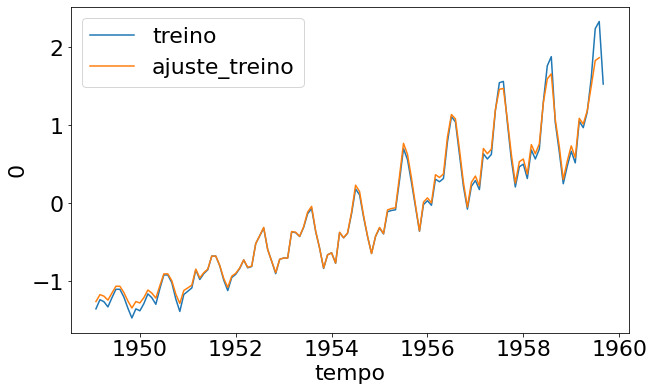

In [56]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
plt.show()

In [57]:
y_predict_testenovo = regressor3.predict(xteste_novo)

In [58]:
resultado = pd.DataFrame(y_predict_testenovo)[0]

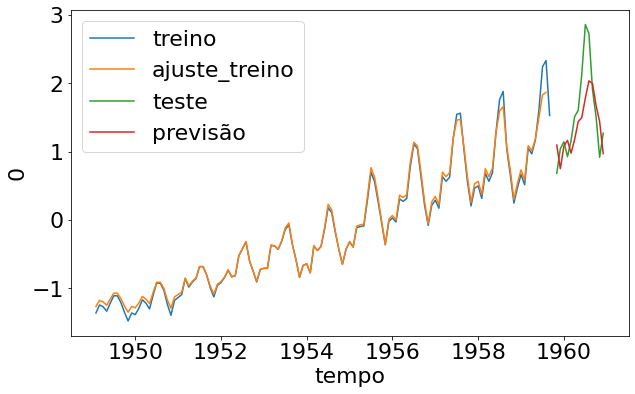

In [59]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')
plt.show()

In [60]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [61]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [62]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [63]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [64]:
regressor4 = Sequential()

In [65]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False))
regressor4.add(Dense(64, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False))
regressor4.add(Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False))

In [66]:
regressor4.compile(loss='mean_squared_error', optimizer='adam')

In [67]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 4ms/step - loss: 0.7543
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6746
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.6036
Epoch 4/300
4/4 [==============================] - 0s 4ms/step - loss: 0.5410
Epoch 5/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4787
Epoch 6/300
4/4 [==============================] - 0s 4ms/step - loss: 0.4144
Epoch 7/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3552
Epoch 8/300
4/4 [==============================] - 0s 4ms/step - loss: 0.3028
Epoch 9/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2525
Epoch 10/300
4/4 [==============================] - 0s 4ms/step - loss: 0.2147
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1852
Epoch 12/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1670
Epoch 13/300
4/4 [==============================] - 0s 3ms/st

In [68]:
y_predict_novo = regressor4.predict(xtreino_novo)

In [69]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [70]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [71]:
resultado2 = pd.DataFrame(y_predict_teste_novo)[0]

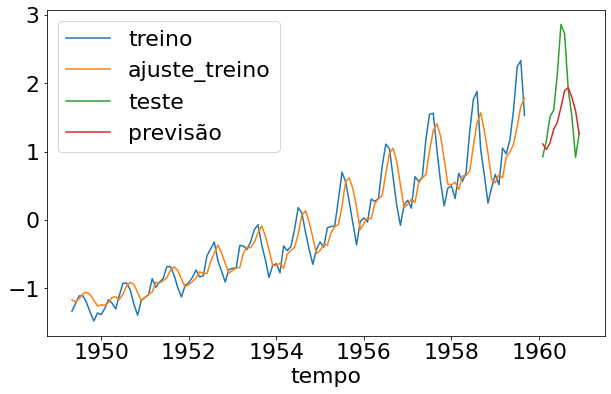

In [72]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado2.values, data=passageiros[133:144], label='previsão')
plt.show()

## Carregando um novo conjunto de dados e ajustando

In [76]:
uri2 = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv"
bike = pd.read_csv(uri2, sep=',')
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [77]:
bike['datas'] = pd.to_datetime(bike['datas'])

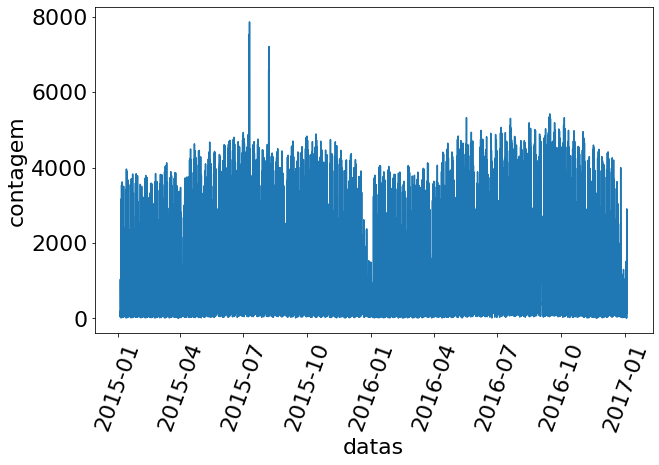

In [79]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)
plt.show()

In [80]:
sc2 = StandardScaler()

In [82]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [83]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [84]:
tamanho_treino2 = int(len(bike)*0.9)
tamanho_teste2 = len(bike) - tamanho_treino2

In [85]:
ytreino = y[0:tamanho_treino2]

In [86]:
yteste = y[tamanho_treino2:len(bike)]

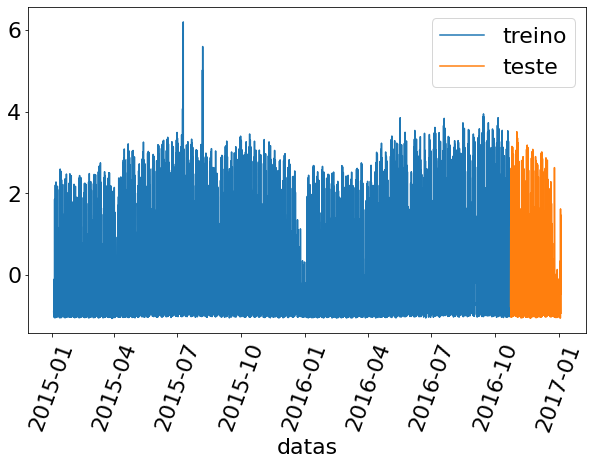

In [88]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino2], label='treino')
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino2:len(bike)], label='teste')
plt.xticks(rotation=70)
plt.show()

In [89]:
vetor = pd.DataFrame(ytreino)[0]

In [90]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 10)

In [91]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [92]:
vetor2 = pd.DataFrame(yteste)[0]

In [93]:
xteste_novo, yteste_novo = separa_dados(vetor2, 10)

## Redes recorrentes

In [94]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1], 1))

In [95]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1], 1))

LSTM: Long Short Term Memory

In [97]:
from tensorflow.keras.layers import LSTM

In [98]:
recorrente = Sequential()

In [99]:
recorrente.add(LSTM(128, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))

É escolhido o RMSProp como otimizador dos pesos no treinamento da rede neural. O objetivo foi utilizar um otimizador adaptativo. Um otimizador adaptativo é capaz de controlar o gradiente e evitar que este cresça ou diminua muito. Entretanto, a escolha do RMSProp é feita para chamar a atenção sobre o otimizador. Tanto o Adam quanto o RMSProp são adaptativos e seriam boas escolhas para a solução do problema. 

In [100]:
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')

In [101]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [102]:
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 7s 10ms/step - loss: 0.2655 - val_loss: 0.0906
Epoch 2/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0767 - val_loss: 0.0453
Epoch 3/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0555 - val_loss: 0.0343
Epoch 4/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0467 - val_loss: 0.0309
Epoch 5/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0420 - val_loss: 0.0327
Epoch 6/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0391 - val_loss: 0.0488
Epoch 7/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0370 - val_loss: 0.0213
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0350 - val_loss: 0.0216
Epoch 9/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0335 - val_loss: 0.0265
Epoch 10/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0325 - val_

In [103]:
y_ajustado = recorrente.predict(xtreino_novo)

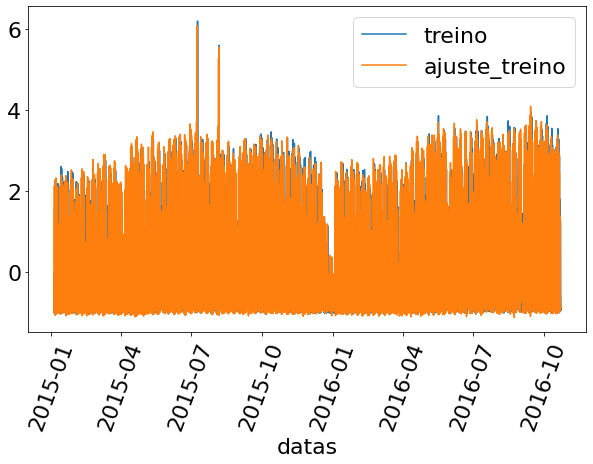

In [105]:
sns.lineplot(x='datas', y=ytreino[:,0], data=bike[0:tamanho_treino2], label='treino')
sns.lineplot(x='datas', y=y_ajustado[:,0], data=bike[0:15662], label='ajuste_treino')
plt.xticks(rotation=70)
plt.show()

In [106]:
y_predito = recorrente.predict(xteste_novo)

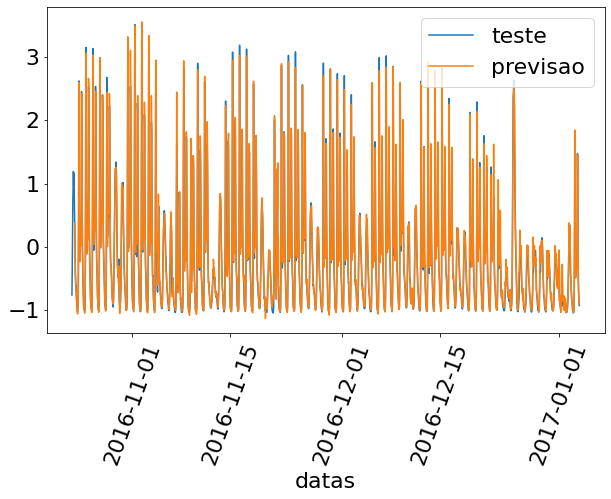

In [107]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino2:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito[:,0], data=bike[tamanho_treino2+10:len(bike)], label='previsao')
plt.xticks(rotation=70)
plt.show()

In [108]:
from tensorflow.keras.layers import GRU

In [110]:
recorrente_g = Sequential()

In [111]:
recorrente_g.add(GRU(120, input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente_g.add(Dense(units=1))

In [112]:
recorrente_g.compile(loss='mean_squared_error', optimizer='RMSProp')

In [113]:
recorrente.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [114]:
recorrente_g.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 120)               44280     
                                                                 
 dense_11 (Dense)            (None, 1)                 121       
                                                                 
Total params: 44,401
Trainable params: 44,401
Non-trainable params: 0
_________________________________________________________________


In [115]:
resultado2 = recorrente_g.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo, yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 6s 8ms/step - loss: 0.2107 - val_loss: 0.0462
Epoch 2/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0643 - val_loss: 0.0487
Epoch 3/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0495 - val_loss: 0.0263
Epoch 4/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0414 - val_loss: 0.0256
Epoch 5/100
490/490 [==============================] - 4s 7ms/step - loss: 0.0377 - val_loss: 0.0226
Epoch 6/100
490/490 [==============================] - 4s 8ms/step - loss: 0.0351 - val_loss: 0.0212
Epoch 7/100
490/490 [==============================] - 5s 10ms/step - loss: 0.0336 - val_loss: 0.0206
Epoch 8/100
490/490 [==============================] - 4s 9ms/step - loss: 0.0318 - val_loss: 0.0172
Epoch 9/100
490/490 [==============================] - 5s 11ms/step - loss: 0.0310 - val_loss: 0.0208
Epoch 10/100
490/490 [==============================] - 5s 9ms/step - loss: 0.0304 - val_

In [116]:
y_predito2 = recorrente_g.predict(xteste_novo)

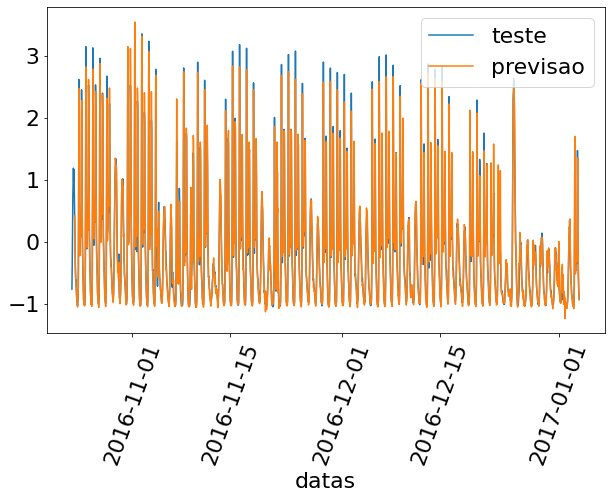

In [117]:
sns.lineplot(x='datas', y=yteste[:,0], data=bike[tamanho_treino2:len(bike)], label='teste')
sns.lineplot(x='datas', y=y_predito2[:,0], data=bike[tamanho_treino2+10:len(bike)], label='previsao')
plt.xticks(rotation=70)
plt.show()

In [118]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


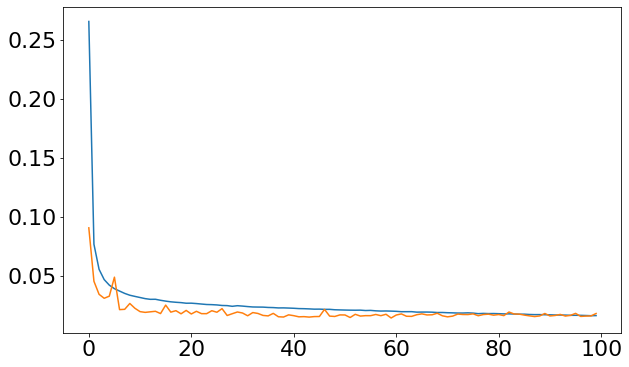

In [119]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.show()

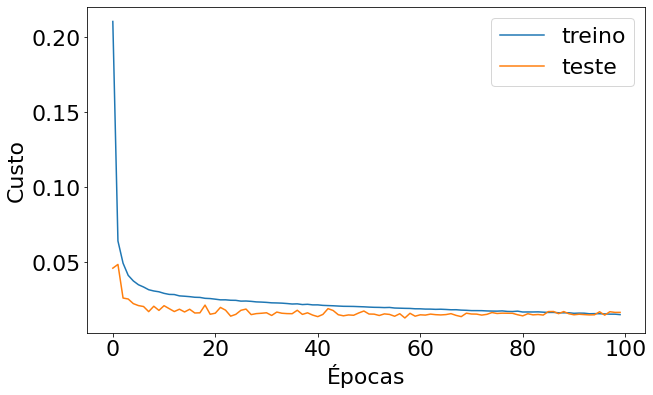

In [120]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Para o nosso caso, a GRU é mais rápida para treinar.